<a href="https://colab.research.google.com/github/jedrexd/WTUM_11_2022/blob/main/Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import BayesianRidge, ARDRegression, LinearRegression, Ridge
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector

In [ ]:
!git clone https://github.com/jedrexd/WTUM_11_2022

Cloning into 'WTUM_11_2022'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 113 (delta 6), reused 2 (delta 2), pack-reused 103
Receiving objects: 100% (113/113), 2.06 MiB | 15.59 MiB/s, done.
Resolving deltas: 100% (64/64), done.


# Data Understanding

## Opis

In [ ]:
df = pd.read_csv("/content/WTUM_11_2022/train.csv", header=0)
df = df.iloc[:,1:]
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
col_names = df.columns
col_names

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## Brakujące wartości, wartości odstające, skalowanie

Informacje o kolumnie 1: MSSubClass
Czy są NaNy: False
Unikatowe wartości: (15)
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]


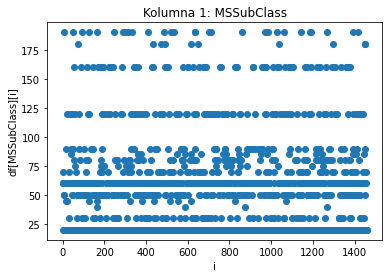



Informacje o kolumnie 2: MSZoning
Czy są NaNy: False
Unikatowe wartości: (5)
['RL' 'RM' 'C (all)' 'FV' 'RH']


Informacje o kolumnie 3: LotFrontage
Czy są NaNy: True
Unikatowe wartości: (111)
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]


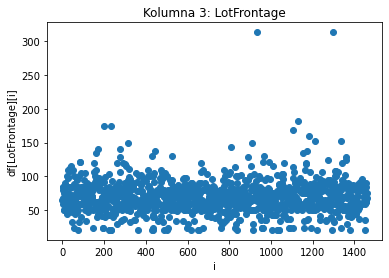



Informacje o kolumnie 4: LotArea
Czy są NaNy: False
Unikatowe wartości: (1073)
[ 8450  9600 11250 ... 17217 13175  9717]


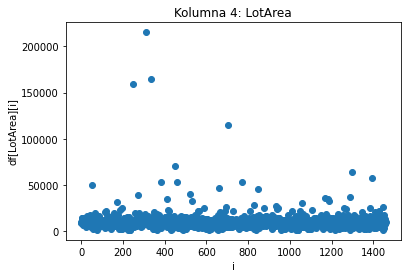



Informacje o kolumnie 5: Street
Czy są NaNy: False
Unikatowe wartości: (2)
['Pave' 'Grvl']


Informacje o kolumnie 6: Alley
Czy są NaNy: True
Unikatowe wartości: (3)
[nan 'Grvl' 'Pave']


Informacje o kolumnie 7: LotShape
Czy są NaNy: False
Unikatowe wartości: (4)
['Reg' 'IR1' 'IR2' 'IR3']


Informacje o kolumnie 8: LandContour
Czy są NaNy: False
Unikatowe wartości: (4)
['Lvl' 'Bnk' 'Low' 'HLS']


Informacje o kolumnie 9: Utilities
Czy są NaNy: False
Unikatowe wartości: (2)
['AllPub' 'NoSeWa']


Informacje o kolumnie 10: LotConfig
Czy są NaNy: False
Unikatowe wartości: (5)
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


Informacje o kolumnie 11: LandSlope
Czy są NaNy: False
Unikatowe wartości: (3)
['Gtl' 'Mod' 'Sev']


Informacje o kolumnie 12: Neighborhood
Czy są NaNy: False
Unikatowe wartości: (25)
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'Cl

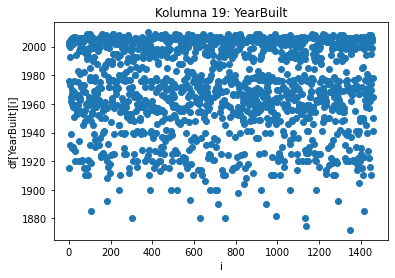



Informacje o kolumnie 20: YearRemodAdd
Czy są NaNy: False
Unikatowe wartości: (61)
[2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]


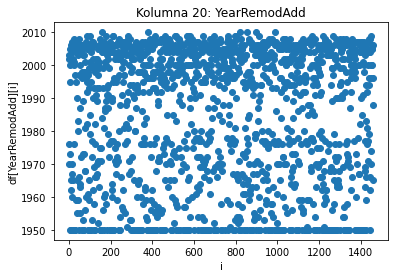



Informacje o kolumnie 21: RoofStyle
Czy są NaNy: False
Unikatowe wartości: (6)
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']


Informacje o kolumnie 22: RoofMatl
Czy są NaNy: False
Unikatowe wartości: (8)
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']


Informacje o kolumnie 23: Exterior1st
Czy są NaNy: False
Unikatowe wartości: (15)
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']


Informacje o kolumnie 24: Exterior2nd
Czy są NaNy: False
Unikatowe wartości: (16)
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']


Informacje o kolumnie 25: MasVnrType
Czy są NaNy: True
Unikatowe wartości: (5)
['BrkFace' 'None' 'Stone' 'BrkCmn' nan]


Informacje o kolumnie 26: MasVnrArea
Czy są NaNy: True
Unikatowe wartości: (328)
[1.960e+02 0.000e+00 1.620e+02 

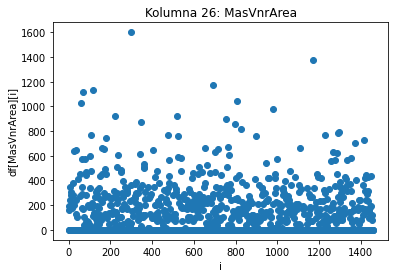



Informacje o kolumnie 27: ExterQual
Czy są NaNy: False
Unikatowe wartości: (4)
['Gd' 'TA' 'Ex' 'Fa']


Informacje o kolumnie 28: ExterCond
Czy są NaNy: False
Unikatowe wartości: (5)
['TA' 'Gd' 'Fa' 'Po' 'Ex']


Informacje o kolumnie 29: Foundation
Czy są NaNy: False
Unikatowe wartości: (6)
['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']


Informacje o kolumnie 30: BsmtQual
Czy są NaNy: True
Unikatowe wartości: (5)
['Gd' 'TA' 'Ex' nan 'Fa']


Informacje o kolumnie 31: BsmtCond
Czy są NaNy: True
Unikatowe wartości: (5)
['TA' 'Gd' nan 'Fa' 'Po']


Informacje o kolumnie 32: BsmtExposure
Czy są NaNy: True
Unikatowe wartości: (5)
['No' 'Gd' 'Mn' 'Av' nan]


Informacje o kolumnie 33: BsmtFinType1
Czy są NaNy: True
Unikatowe wartości: (7)
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']


Informacje o kolumnie 34: BsmtFinSF1
Czy są NaNy: False
Unikatowe wartości: (637)
[ 706  978  486  216  655  732 1369  859    0  851  906  998  737  733
  578  646  504  840  188  234 1218 1277 1018 1153 1213  7

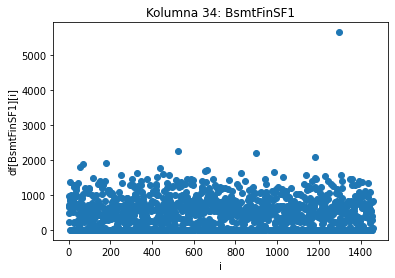



Informacje o kolumnie 35: BsmtFinType2
Czy są NaNy: True
Unikatowe wartości: (7)
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


Informacje o kolumnie 36: BsmtFinSF2
Czy są NaNy: False
Unikatowe wartości: (144)
[   0   32  668  486   93  491  506  712  362   41  169  869  150  670
   28 1080  181  768  215  374  208  441  184  279  306  180  580  690
  692  228  125 1063  620  175  820 1474  264  479  147  232  380  544
  294  258  121  391  531  344  539  713  210  311 1120  165  532   96
  495  174 1127  139  202  645  123  551  219  606  612  480  182  132
  336  468  287   35  499  723  119   40  117  239   80  472   64 1057
  127  630  128  377  764  345 1085  435  823  500  290  324  634  411
  841 1061  466  396  354  149  193  273  465  400  682  557  230  106
  791  240  547  469  177  108  600  492  211  168 1031  438  375  144
   81  906  608  276  661   68  173  972  105  420  546  334  352  872
  110  627  163 1029]


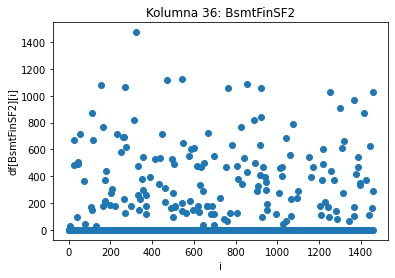



Informacje o kolumnie 37: BsmtUnfSF
Czy są NaNy: False
Unikatowe wartości: (780)
[ 150  284  434  540  490   64  317  216  952  140  134  177  175 1494
  520  832  426    0  468  525 1158  637 1777  200  204 1566  180  486
  207  649 1228 1234  380  408 1117 1097   84  326  445  383  167  465
 1296   83 1632  736  192  612  816   32  935  321  860 1410  148  217
  530 1346  576  318 1143 1035  440  747  701  343  280  404  840  724
  295 1768  448   36 1530 1065  384 1288  684 1013  402  635  163  168
  176  370  350  381  410  741 1226 1053  641  516  793 1139  550  905
  104  310  252 1125  203  728  732  510  899 1362   30  958  556  413
  479  297  658  262  891 1304  519 1907  336  107  432  403  811  396
  970  506  884  400  896  253  409   93 1200  572  774  769 1335  340
  882  779  112  470  294 1686  360  441  354  700  725  320  554  312
  968  504 1107  577  660   99  871  474  289  600  755  625 1121  276
  186 1424 1140  375   92  305 1176   78  274  311  710  686  457

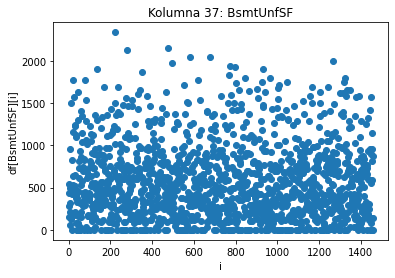



Informacje o kolumnie 38: TotalBsmtSF
Czy są NaNy: False
Unikatowe wartości: (721)
[ 856 1262  920  756 1145  796 1686 1107  952  991 1040 1175  912 1494
 1253  832 1004    0 1114 1029 1158  637 1777 1060 1566  900 1704 1484
  520  649 1228 1234 1398 1561 1117 1097 1297 1057 1088 1350  840  938
 1150 1752 1434 1656  736  955  794  816 1842  384 1425  970  860 1410
  780  530 1370  576 1143 1947 1453  747 1304 2223  845 1086  462  672
 1768  440  896 1237 1563 1065 1288  684  612 1013  990 1235  876 1214
  824  680 1588  960  458  950 1610  741 1226 1053  641  789  793 1844
  994 1264 1809 1028  729 1092 1125 1673  728  732 1080 1199 1362 1078
  660 1008  924  992 1063 1267 1461 1907  928  864 1734  910 1490 1728
  715  884  969 1710  825 1602 1200  572  774 1392 1232 1572 1541  882
 1149  644 1617 1582  720 1064 1606 1202 1151 1052 2216  968  504 1188
 1593  853  725 1431  855 1726 1360  755 1713 1121 1196  617  848 1424
 1140 1100 1157 1212  689 1070 1436  686  798 1248 1498 1010  7

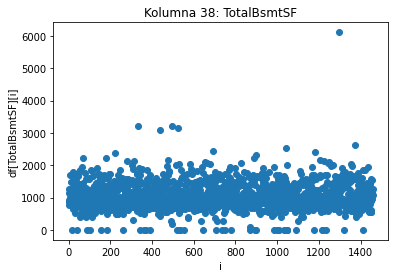



Informacje o kolumnie 39: Heating
Czy są NaNy: False
Unikatowe wartości: (6)
['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']


Informacje o kolumnie 40: HeatingQC
Czy są NaNy: False
Unikatowe wartości: (5)
['Ex' 'Gd' 'TA' 'Fa' 'Po']


Informacje o kolumnie 41: CentralAir
Czy są NaNy: False
Unikatowe wartości: (2)
['Y' 'N']


Informacje o kolumnie 42: Electrical
Czy są NaNy: True
Unikatowe wartości: (6)
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


Informacje o kolumnie 43: 1stFlrSF
Czy są NaNy: False
Unikatowe wartości: (753)
[ 856 1262  920  961 1145  796 1694 1107 1022 1077 1040 1182  912 1494
 1253  854 1004 1296 1114 1339 1158 1108 1795 1060 1600  900 1704  520
  649 1228 1234 1700 1561 1132 1097 1297 1057 1152 1324 1328  884  938
 1150 1752 1518 1656  736  955  794  816 1842 1360 1425  983  860 1426
  780  581 1370  902 1143 2207 1479  747 1304 2223  845  885 1086  840
  526  952 1072 1768  682 1337 1563 1065  804 1301  684  612 1013  990
 1235  964 1260  905  680 1588  960  835 12

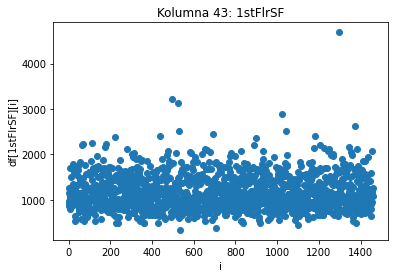



Informacje o kolumnie 44: 2ndFlrSF
Czy są NaNy: False
Unikatowe wartości: (417)
[ 854    0  866  756 1053  566  983  752 1142 1218  668 1320  631  716
  676  860 1519  530  808  977 1330  833  765  462  213  548  960  670
 1116  876  612 1031  881  790  755  592  939  520  639  656 1414  884
  729 1523  728  351  688  941 1032  848  836  475  739 1151  448  896
  524 1194  956 1070 1096  467  547  551  880  703  901  720  316 1518
  704 1178  754  601 1360  929  445  564  882  920  518  817 1257  741
  672 1306  504 1304 1100  730  689  591  888 1020  828  700  842 1286
  864  829 1092  709  844 1106  596  807  625  649  698  840  780  568
  795  648  975  702 1242 1818 1121  371  804  325  809 1200  871 1274
 1347 1332 1177 1080  695  167  915  576  605  862  495  403  838  517
 1427  784  711  468 1081  886  793  665  858  874  526  590  406 1157
  299  936  438 1098  766 1101 1028 1017 1254  378 1160  682  110  600
  678  834  384  512  930  868  224 1103  560  811  878  574  910 

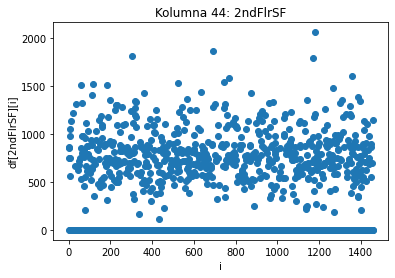



Informacje o kolumnie 45: LowQualFinSF
Czy są NaNy: False
Unikatowe wartości: (24)
[  0 360 513 234 528 572 144 392 371 390 420 473 156 515  80  53 232 481
 120 514 397 479 205 384]


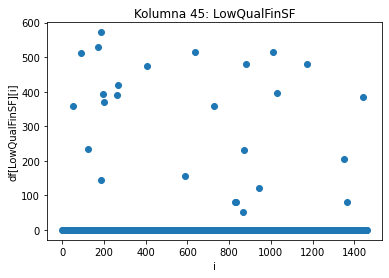



Informacje o kolumnie 46: GrLivArea
Czy są NaNy: False
Unikatowe wartości: (861)
[1710 1262 1786 1717 2198 1362 1694 2090 1774 1077 1040 2324  912 1494
 1253  854 1004 1296 1114 1339 2376 1108 1795 1060 1600  900 1704  520
 1317 1228 1234 1700 1561 2452 1097 1297 1057 1152 1324 1328  884  938
 1150 1752 2149 1656 1452  955 1470 1176  816 1842 1360 1425 1739 1720
 2945  780 1158 1111 1370 2034 2473 2207 1479  747 2287 2223  845 1718
 1086 1605  988  952 1285 1768 1230 2142 1337 1563 1065 1474 2417 1560
 1224 1526  990 1235  964 2291 1588  960  835 1225 1610 1732 1535 1226
 1818 1992 1047  789 1517 1844 1855 1430 2696 2259 2320 1458 1092 1125
 3222 1456 1123 1080 1199 1586  754  958  840 1348 1053 2157 2054 1327
 1721 1682 1214 1959 1852 1764  864 1734 1385 1501 1728 1709  875 2035
 1344  969 1993 1252 1200 1096 1968 1947 2462 1232 2668 1541  882 1616
 1355 1867 2161 1707 1382 1767 1651 2158 2060 1920 2234  968 1525 1802
 1340 2082 3608 1217 1593 2727 1431 1726 3112 2229 1713 1121 1279

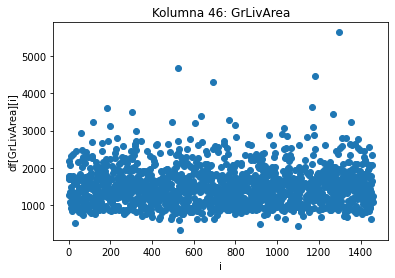



Informacje o kolumnie 47: BsmtFullBath
Czy są NaNy: False
Unikatowe wartości: (4)
[1 0 2 3]


Informacje o kolumnie 48: BsmtHalfBath
Czy są NaNy: False
Unikatowe wartości: (3)
[0 1 2]


Informacje o kolumnie 49: FullBath
Czy są NaNy: False
Unikatowe wartości: (4)
[2 1 3 0]


Informacje o kolumnie 50: HalfBath
Czy są NaNy: False
Unikatowe wartości: (3)
[1 0 2]


Informacje o kolumnie 51: BedroomAbvGr
Czy są NaNy: False
Unikatowe wartości: (8)
[3 4 1 2 0 5 6 8]


Informacje o kolumnie 52: KitchenAbvGr
Czy są NaNy: False
Unikatowe wartości: (4)
[1 2 3 0]


Informacje o kolumnie 53: KitchenQual
Czy są NaNy: False
Unikatowe wartości: (4)
['Gd' 'TA' 'Ex' 'Fa']


Informacje o kolumnie 54: TotRmsAbvGrd
Czy są NaNy: False
Unikatowe wartości: (12)
[ 8  6  7  9  5 11  4 10 12  3  2 14]


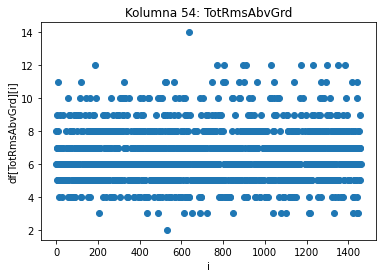



Informacje o kolumnie 55: Functional
Czy są NaNy: False
Unikatowe wartości: (7)
['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']


Informacje o kolumnie 56: Fireplaces
Czy są NaNy: False
Unikatowe wartości: (4)
[0 1 2 3]


Informacje o kolumnie 57: FireplaceQu
Czy są NaNy: True
Unikatowe wartości: (6)
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


Informacje o kolumnie 58: GarageType
Czy są NaNy: True
Unikatowe wartości: (7)
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']


Informacje o kolumnie 59: GarageYrBlt
Czy są NaNy: True
Unikatowe wartości: (98)
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.


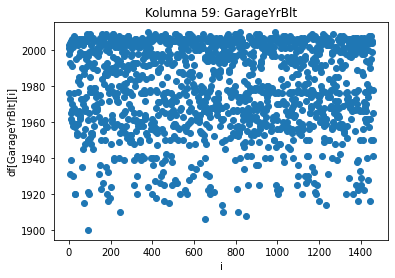



Informacje o kolumnie 60: GarageFinish
Czy są NaNy: True
Unikatowe wartości: (4)
['RFn' 'Unf' 'Fin' nan]


Informacje o kolumnie 61: GarageCars
Czy są NaNy: False
Unikatowe wartości: (5)
[2 3 1 0 4]


Informacje o kolumnie 62: GarageArea
Czy są NaNy: False
Unikatowe wartości: (441)
[ 548  460  608  642  836  480  636  484  468  205  384  736  352  840
  576  516  294  853  280  534  572  270  890  772  319  240  250  271
  447  556  691  672  498  246    0  440  308  504  300  670  826  386
  388  528  894  565  641  288  645  852  558  220  667  360  427  490
  379  297  283  509  405  758  461  400  462  420  432  506  684  472
  366  476  410  740  648  273  546  325  792  450  180  430  594  390
  540  264  530  435  453  750  487  624  471  318  766  660  470  720
  577  380  434  866  495  564  312  625  680  678  726  532  216  303
  789  511  616  521  451 1166  252  497  682  666  786  795  856  473
  398  500  349  454  644  299  210  431  438  675  968  721  336  810
  494

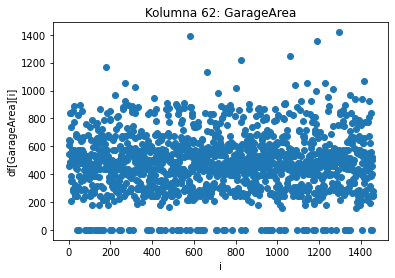



Informacje o kolumnie 63: GarageQual
Czy są NaNy: True
Unikatowe wartości: (6)
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']


Informacje o kolumnie 64: GarageCond
Czy są NaNy: True
Unikatowe wartości: (6)
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


Informacje o kolumnie 65: PavedDrive
Czy są NaNy: False
Unikatowe wartości: (3)
['Y' 'N' 'P']


Informacje o kolumnie 66: WoodDeckSF
Czy są NaNy: False
Unikatowe wartości: (274)
[  0 298 192  40 255 235  90 147 140 160  48 240 171 100 406 222 288  49
 203 113 392 145 196 168 112 106 857 115 120  12 576 301 144 300  74 127
 232 158 352 182 180 166 224  80 367  53 188 105  24  98 276 200 409 239
 400 476 178 574 237 210 441 116 280 104  87 132 238 149 355  60 139 108
 351 209 216 248 143 365 370  58 197 263 123 138 333 250 292  95 262  81
 289 124 172 110 208 468 256 302 190 340 233 184 201 142 122 155 670 135
 495 536 306  64 364 353  66 159 146 296 125  44 215 264  88  89  96 414
 519 206 141 260 324 156 220  38 261 126  85 466 270  78 169 320 268  72
 349  42  35

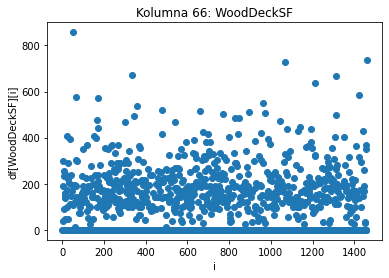



Informacje o kolumnie 67: OpenPorchSF
Czy są NaNy: False
Unikatowe wartości: (202)
[ 61   0  42  35  84  30  57 204   4  21  33 213 112 102 154 159 110  90
  56  32  50 258  54  65  38  47  64  52 138 104  82  43 146  75  72  70
  49  11  36 151  29  94 101 199  99 234 162  63  68  46  45 122 184 120
  20  24 130 205 108  80  66  48  25  96 111 106  40 114   8 136 132  62
 228  60 238 260  27  74  16 198  26  83  34  55  22  98 172 119 208 105
 140 168  28  39 148  12  51 150 117 250  10  81  44 144 175 195 128  76
  17  59 214 121  53 231 134 192 123  78 187  85 133 176 113 137 125 523
 100 285  88 406 155  73 182 502 274 158 142 243 235 312 124 267 265  87
 288  23 152 341 116 160 174 247 291  18 170 156 166 129 418 240  77 364
 188 207  67  69 131 191  41 118 252 189 282 135  95 224 169 319  58  93
 244 185 200  92 180 263 304 229 103 211 287 292 241 547  91  86 262 210
 141  15 126 236]


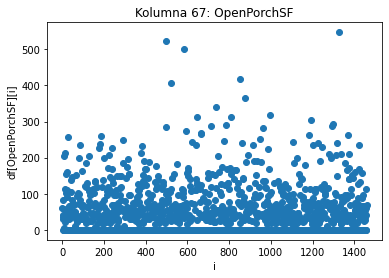



Informacje o kolumnie 68: EnclosedPorch
Czy są NaNy: False
Unikatowe wartości: (120)
[  0 272 228 205 176  87 172 102  37 144  64 114 202 128 156  44  77 192
 140 180 183  39 184  40 552  30 126  96  60 150 120 112 252  52 224 234
 244 268 137  24 108 294 177 218 242  91 160 130 169 105  34 248 236  32
  80 115 291 116 158 210  36 200  84 148 136 240  54 100 189 293 164 216
 239  67  90  56 129  98 143  70 386 154 185 134 196 264 275 230 254  68
 194 318  48  94 138 226 174  19 170 220 214 280 190 330 208 145 259  81
  42 123 162 286 168  20 301 198 221 212  50  99]


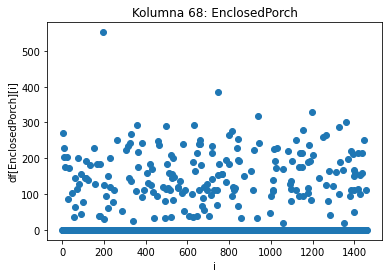



Informacje o kolumnie 69: 3SsnPorch
Czy są NaNy: False
Unikatowe wartości: (20)
[  0 320 407 130 180 168 140 508 238 245 196 144 182 162  23 216  96 153
 290 304]


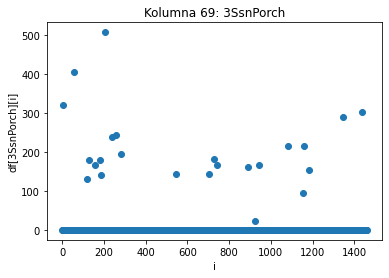



Informacje o kolumnie 70: ScreenPorch
Czy są NaNy: False
Unikatowe wartości: (76)
[  0 176 198 291 252  99 184 168 130 142 192 410 224 266 170 154 153 144
 128 259 160 271 234 374 185 182  90 396 140 276 180 161 145 200 122  95
 120  60 126 189 260 147 385 287 156 100 216 210 197 204 225 152 175 312
 222 265 322 190 233  63  53 143 273 288 263  80 163 116 480 178 440 155
 220 119 165  40]


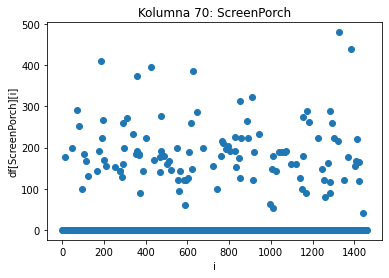



Informacje o kolumnie 71: PoolArea
Czy są NaNy: False
Unikatowe wartości: (8)
[  0 512 648 576 555 480 519 738]


Informacje o kolumnie 72: PoolQC
Czy są NaNy: True
Unikatowe wartości: (4)
[nan 'Ex' 'Fa' 'Gd']


Informacje o kolumnie 73: Fence
Czy są NaNy: True
Unikatowe wartości: (5)
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


Informacje o kolumnie 74: MiscFeature
Czy są NaNy: True
Unikatowe wartości: (5)
[nan 'Shed' 'Gar2' 'Othr' 'TenC']


Informacje o kolumnie 75: MiscVal
Czy są NaNy: False
Unikatowe wartości: (21)
[    0   700   350   500   400   480   450 15500  1200   800  2000   600
  3500  1300    54   620   560  1400  8300  1150  2500]


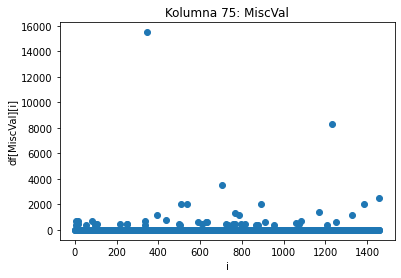



Informacje o kolumnie 76: MoSold
Czy są NaNy: False
Unikatowe wartości: (12)
[ 2  5  9 12 10  8 11  4  1  7  3  6]


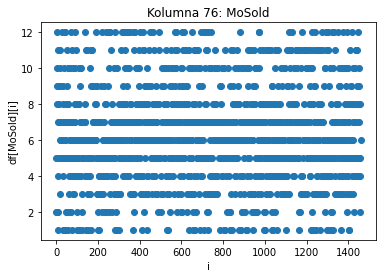



Informacje o kolumnie 77: YrSold
Czy są NaNy: False
Unikatowe wartości: (5)
[2008 2007 2006 2009 2010]


Informacje o kolumnie 78: SaleType
Czy są NaNy: False
Unikatowe wartości: (9)
['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']


Informacje o kolumnie 79: SaleCondition
Czy są NaNy: False
Unikatowe wartości: (6)
['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


Informacje o kolumnie 80: SalePrice
Czy są NaNy: False
Unikatowe wartości: (663)
[208500 181500 223500 140000 250000 143000 307000 200000 129900 118000
 129500 345000 144000 279500 157000 132000 149000  90000 159000 139000
 325300 139400 230000 154000 256300 134800 306000 207500  68500  40000
 149350 179900 165500 277500 309000 145000 153000 109000  82000 160000
 170000 130250 141000 319900 239686 249700 113000 127000 177000 114500
 110000 385000 130000 180500 172500 196500 438780 124900 158000 101000
 202500 219500 317000 180000 226000  80000 225000 244000 185000 144900
 107400  91000 135750 136500 1

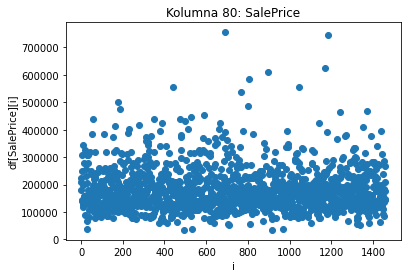

In [ ]:
from pandas.core.dtypes.common import is_numeric_dtype
col_names = df.columns

# lista boolean odpowiadajaca na pytanie czy tworzyc wykres scatter do danej kolumny (czyli czy jest ona ciagla)
paint = {col: 0 for col in col_names}
# wykresy beda pokazywane tylko dla kolumn numerycznych, ktore sa ciagle
for col in paint:
  if ( (is_numeric_dtype(df[col])) and (len(df[col].unique()) > 11) ):
    paint[col] = 1

# wypisanie informacji o NaNach, unikatowych wartości oraz wykresow 
i = 1
for col in col_names:
  print(f'Informacje o kolumnie {i}: {col}')
  print(f'Czy są NaNy: {df[col].isnull().values.any()}')
  print(f'Unikatowe wartości: ({len(df[col].unique())})')
  print(df[col].unique())
  if paint[col]:
    plt.scatter(range(0,len(df[col])), df[col].fillna(df[col].mode()))
    plt.xlabel('i')
    plt.ylabel(f'df[{col}][i]')
    plt.title(f'Kolumna {i}: {col}')
    plt.show()
  print('')
  print('')
  i += 1

In [ ]:
# PODSUMOWANIE / INFO DLA JĘDRZEJA

summary = pd.DataFrame(col_names)
summary.columns = ['Nazwa kolumny']
summary['NaNy'] = [df[col].isnull().values.any() for col in col_names]
summary['Ilosc unikatowych wartosci'] = [len(df[col].unique()) for col in col_names] 

summary.set_index('Nazwa kolumny', inplace = True)  # zmieniam indeksy na nazwy kolumn, chyba to ma wiekszy sens

# tworzenie kolumny mowiacej o tym czy zmienna jest ciagla czy nie
zmienna_ciagla = []
for col in col_names:
  if ( (is_numeric_dtype(df[col])) and (len(df[col].unique()) > 11) ):
    zmienna_ciagla.append(True)
  else:
    zmienna_ciagla.append(False)

summary['Zmienna ciagla'] = zmienna_ciagla

# manualnie okreslam gdzie sa outliery (jesli są watpliwosci to zaokraglam do False)
outliery = [False for col in col_names]
outliery[2] = True
outliery[3] = True
outliery[33] = True
outliery[37] = True
outliery[42] = True
outliery[45] = True
outliery[67] = True
outliery[68] = True
outliery[74] = True


summary['Outliery'] = outliery

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(summary)

,NaNy,Ilosc unikatowych wartosci,Zmienna ciagla,Outliery
Nazwa kolumny,,,,
MSSubClass,False,15,True,False
MSZoning,False,5,False,False
LotFrontage,True,111,True,True
LotArea,False,1073,True,True
Street,False,2,False,False
Alley,True,3,False,False
LotShape,False,4,False,False
LandContour,False,4,False,False
Utilities,False,2,False,False


## Komorki, ktore moze sie jeszcze przydadza

In [ ]:
# ostatnie 61-80 kolumn, sprawdzannie outlierów
print('GarageCars')
print(df['GarageCars'].unique()) # brak
print('GarageQual')
print(df['GarageQual'].unique()) # brak
print('GarageCond')
print(df['GarageCond'].unique()) # brak
print('PavedDrive')
print(df['PavedDrive'].unique()) # brak
print('WoodDeckSF')
print(df['WoodDeckSF'].unique()) # potencjonalnie są
print('OpenPorchSF')
print(df['OpenPorchSF'].unique()) # potencjonalnie są
print('EnclosedPorch')
print(df['EnclosedPorch'].unique()) # potencjonalnie są 
print('3SsnPorch')
print(df['3SsnPorch'].unique()) # potencjonalnie są
print('ScreenPorch')
print(df['ScreenPorch'].unique()) # potencjonalnie są
print('PoolArea')
print(df['PoolArea'].unique()) # brak
print('PoolQC')
print(df['PoolQC'].unique()) # brak
print('Fence')
print(df['Fence'].unique()) # brak
print('MiscFeature')
print(df['MiscFeature'].unique()) # brak
print('MiscVal')
print(df['MiscVal'].unique()) # brak
print('GaraMoSoldgeCars')
print(df['MoSold'].unique()) # brak
print('YrSold')
print(df['YrSold'].unique()) # brak
print('SaleType')
print(df['SaleType'].unique()) # brak
print('SaleCondition')
print(df['SaleCondition'].unique()) # brak

GarageCars
[2 3 1 0 4]
GarageQual
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
PavedDrive
['Y' 'N' 'P']
WoodDeckSF
[  0 298 192  40 255 235  90 147 140 160  48 240 171 100 406 222 288  49
 203 113 392 145 196 168 112 106 857 115 120  12 576 301 144 300  74 127
 232 158 352 182 180 166 224  80 367  53 188 105  24  98 276 200 409 239
 400 476 178 574 237 210 441 116 280 104  87 132 238 149 355  60 139 108
 351 209 216 248 143 365 370  58 197 263 123 138 333 250 292  95 262  81
 289 124 172 110 208 468 256 302 190 340 233 184 201 142 122 155 670 135
 495 536 306  64 364 353  66 159 146 296 125  44 215 264  88  89  96 414
 519 206 141 260 324 156 220  38 261 126  85 466 270  78 169 320 268  72
 349  42  35 326 382 161 179 103 253 148 335 176 390 328 312 185 269 195
  57 236 517 304 198 426  28 316 322 307 257 219 416 344 380  68 114 327
 165 187 181  92 228 245 503 315 241 303 133 403  36  52 265 207 150 290
 486 278  70 418 234  26 342  97 272 121 243 511 154 1

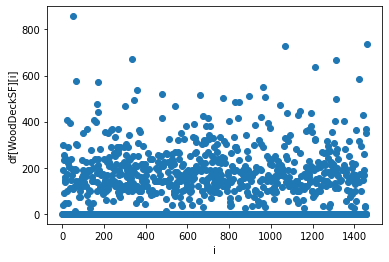

In [ ]:
plt.scatter(range(0,len(df['WoodDeckSF'])), df['WoodDeckSF'])
plt.xlabel('i')
plt.ylabel('df[WoodDeckSF][i]')
# Outliering
df = df[((df['WoodDeckSF'] - df['WoodDeckSF'].mean()) / df['WoodDeckSF'].std()).abs() < 5]

Text(0, 0.5, 'df[1stFlrSF][i]')

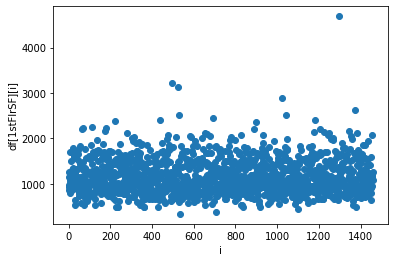

In [ ]:
# '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt'

plt.scatter(range(0,len(df['1stFlrSF'])), df['1stFlrSF'])
plt.xlabel('i')
plt.ylabel('df[1stFlrSF][i]')

Text(0, 0.5, 'df[2ndFlrSF][i]')

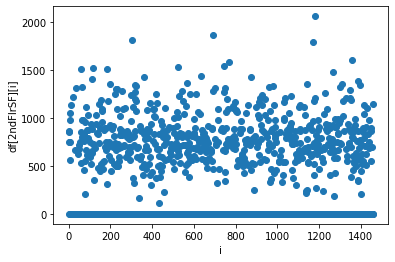

In [ ]:
plt.scatter(range(0,len(df['2ndFlrSF'])), df['2ndFlrSF'])
plt.xlabel('i')
plt.ylabel('df[2ndFlrSF][i]')

Text(0, 0.5, 'df[GrLivArea][i]')

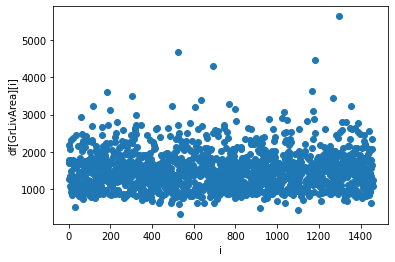

In [ ]:
plt.scatter(range(0,len(df['GrLivArea'])), df['GrLivArea'])
plt.xlabel('i')
plt.ylabel('df[GrLivArea][i]')

Text(0, 0.5, 'df[GarageYrBlt][i]')

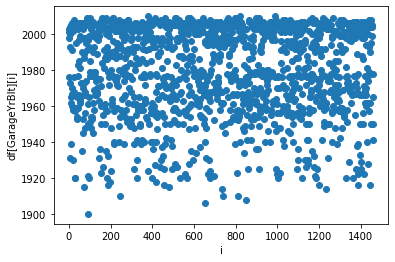

In [ ]:
plt.scatter(range(0,len(df['GarageYrBlt'])), df['GarageYrBlt'])
plt.xlabel('i')
plt.ylabel('df[GarageYrBlt][i]')

Text(0, 0.5, 'df[YearBuilt][i]')

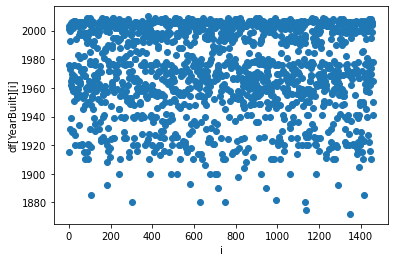

In [ ]:
plt.scatter(range(0,len(df['YearBuilt'])), df['YearBuilt'])
plt.xlabel('i')
plt.ylabel('df[YearBuilt][i]')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


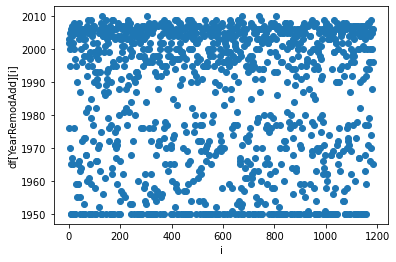

In [ ]:
plt.scatter(range(0,len(df['YearRemodAdd'])), df['YearRemodAdd'])
plt.xlabel('i')
plt.ylabel('df[YearRemodAdd][i]')
df

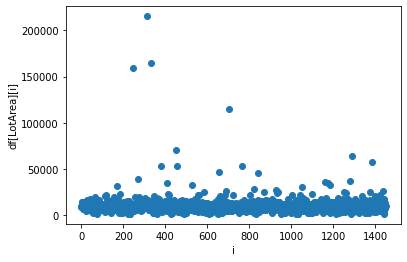

In [ ]:
plt.scatter(range(0,len(df['LotArea'])), df['LotArea'])
plt.xlabel('i')
plt.ylabel('df[LotArea][i]')
# Outliering
df = df[((df['LotArea'] - df['LotArea'].mean()) / df['LotArea'].std()).abs() < 5]

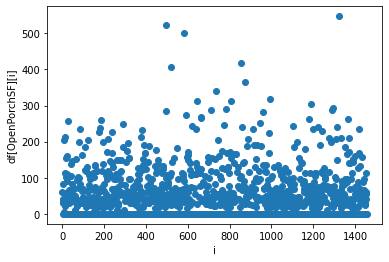

In [ ]:
plt.scatter(range(0,len(df['OpenPorchSF'])), df['OpenPorchSF'])
plt.xlabel('i')
plt.ylabel('df[OpenPorchSF][i]')
# Outliering
df = df[((df['OpenPorchSF'] - df['OpenPorchSF'].mean()) / df['OpenPorchSF'].std()).abs() < 5]

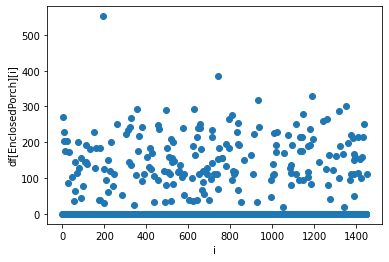

In [ ]:
plt.scatter(range(0,len(df['EnclosedPorch'])), df['EnclosedPorch'])
plt.xlabel('i')
plt.ylabel('df[EnclosedPorch][i]')
# Outliering
df = df[((df['EnclosedPorch'] - df['EnclosedPorch'].mean()) / df['EnclosedPorch'].std()).abs() < 5]

Text(0, 0.5, 'df[3SsnPorch][i]')

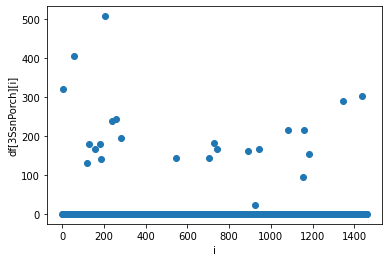

In [ ]:
plt.scatter(range(0,len(df['3SsnPorch'])), df['3SsnPorch'])
plt.xlabel('i')
plt.ylabel('df[3SsnPorch][i]')

8


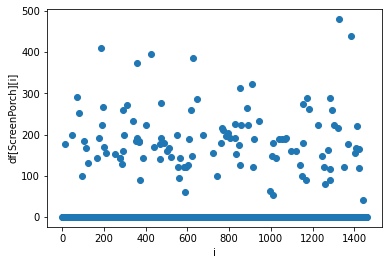

In [ ]:
plt.scatter(range(0,len(df['ScreenPorch'])), df['ScreenPorch'])
plt.xlabel('i')
plt.ylabel('df[ScreenPorch][i]')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


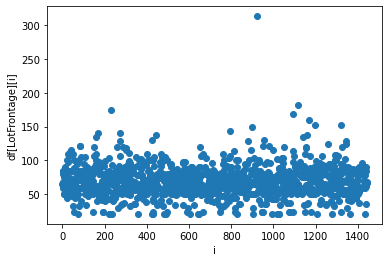

In [ ]:
plt.scatter(range(0,len(df['LotFrontage'])), df['LotFrontage'])
plt.xlabel('i')
plt.ylabel('df[LotFrontage][i]')
# Outliering
df = df[((df['LotFrontage'] - df['LotFrontage'].mean()) / df['LotFrontage'].std()).abs() < 4]
df

# Data Preparation

In [ ]:
def preprocess(dataframe, outliers_solving_method=None):
    # Preprocessing w odpowiedniej kolejności
    # 1) zamiana wartosci nan (jesli trzeba)
    # 2) zamiane wartosci dyskretnych na liczby calkowite (jesli trzeba)
    # 3) zamiana / pozbycie sie outlierow (jesli trzeba)
    # 4) skalowanie zmiennych ciaglych
    def preprocess_column(column, fill_na=None, encoding_dict=None, label_encode=False, is_continues=False, has_outliers=False):
        if fill_na is not None:
            column.fillna(fill_na, inplace=True)
        
        if encoding_dict:
            column.replace(encoding_dict, inplace=True)
        elif label_encode:
            column = LabelEncoder().fit_transform(column.astype('str'))
        
        if is_continues:
            column = StandardScaler().fit_transform(np.array(column).reshape(-1, 1))
        
        if has_outliers:
            if outliers_solving_method == 'mode':
                mean = column.mean()
                std = column.std()
                mode = stats.mode(column)[0]
                lower_bound = mean - (4 * std)
                upper_bound = mean + (4 * std)
                column[np.logical_or(column < lower_bound, column > upper_bound).reshape(-1)] = mode
            if outliers_solving_method == 'remove':
                mean = column.mean()
                std = column.std()
                lower_bound = mean - (4 * std)
                upper_bound = mean + (4 * std)
                column = column[np.logical_or(column > lower_bound, column < upper_bound).reshape(-1)]
        
        return column

    # 00 MSSubClass: Identifies the type of dwelling involved in the sale. - kategorie
    dataframe['MSSubClass'] = preprocess_column(dataframe['MSSubClass'], label_encode = True, is_continues=True)

    # 01 MSZoning: Identifies the general zoning classification of the sale. - kategorie
    dataframe['MSZoning'] = preprocess_column(dataframe['MSZoning'], label_encode = True)

    # 02 LotFrontage: Linear feet of street connected to property - zmienna liczbowa, skalujemy według rozkładu normalnego
    # NA oznacza 0
    dataframe['LotFrontage'] = \
        preprocess_column(dataframe['LotFrontage'], fill_na = 0, is_continues=True, has_outliers=True)

    # 03 LotArea: Lot size in square feet - zmienna liczbowa, skalujemy według rozkładu normalnego
    dataframe['LotArea'] = preprocess_column(dataframe['LotArea'], is_continues=True, has_outliers=True)

    # 04 Street: Type of road access to property - kategoria
    dataframe['Street'] = preprocess_column(dataframe['Street'], label_encode=True)

    # 05 Alley: Type of alley access to property - kategoria
    dataframe['Alley'] = preprocess_column(dataframe['Alley'], fill_na=0, label_encode=True)

    # 06 LotShape: General shape of property - kategoria, zmienna jakościowa
    dataframe['LotShape'] = \
        preprocess_column(dataframe['LotShape'], encoding_dict={"Reg": 1, "IR1": 2, "IR2": 3, "IR3": 4})

    # 07 LandContour: Flatness of the property - kategoria
    dataframe['LandContour'] = preprocess_column(dataframe['LandContour'], label_encode=True)

    # 08 Utilities: Type of utilities available - kategoria, zmienna jakościowa - każda kolejna kategoria oznacza wyższy standard
    dataframe['Utilities'] = \
        preprocess_column(dataframe['Utilities'], encoding_dict={"AllPub": 3, "NoSewr": 2, "NoSeWa": 1, "ELO": 0})

    # 09 LotConfig: Lot configuration - kategoria
    dataframe['LotConfig'] = preprocess_column(dataframe['LotConfig'], label_encode=True)

    # 10 LandSlope: Slope of property - kategoria
    dataframe['LandSlope'] = preprocess_column(dataframe['LandSlope'], label_encode=True)

    # 11 Neighborhood: Physical locations within Ames city limits - kategoria
    dataframe['Neighborhood'] = preprocess_column(dataframe['Neighborhood'], label_encode=True)

    # 12 Condition1: Proximity to various conditions
    # 13 Condition2: Proximity to various conditions (if more than one is present) - kategorie
    dataframe['Condition1'] = preprocess_column(dataframe['Condition1'], encoding_dict=
        {"Artery": 1, "Feedr": 2, "Norm": 3,	"RRNn": 4, "RRAn": 5, "PosN": 6, "PosA": 7, "RRNe": 8, "RRAe": 9})
    dataframe['Condition2'] = preprocess_column(dataframe['Condition2'], encoding_dict=
        {"Artery": 1, "Feedr": 2, "Norm": 3,	"RRNn": 4, "RRAn": 5, "PosN": 6, "PosA": 7, "RRNe": 8, "RRAe": 9})

    # 14 BldgType: Type of dwelling - kategoria
    dataframe['BldgType'] = preprocess_column(dataframe['BldgType'], label_encode=True)

    # 15 HouseStyle: Style of dwelling - kategoria
    dataframe['HouseStyle'] = preprocess_column(dataframe['HouseStyle'], label_encode=True)

    # 16 OverallCond, 17 OverallQual: Zmienne kategoryczny, liczbowe, nie ma potrzeby ich przekształcać

    # 18 YearBuilt
    dataframe['YearBuilt'] = preprocess_column(dataframe['YearBuilt'], is_continues=True)

    # 19 YearRemodAdd, 
    dataframe['YearRemodAdd'] = preprocess_column(dataframe['YearRemodAdd'], is_continues=True)

    # 20 RoofStyle
    dataframe['RoofStyle'] = preprocess_column(dataframe['RoofStyle'], 
        encoding_dict={'Flat': 0, 'Gable': 1, 'Gambrel': 2, 'Hip': 3, 'Mansard': 4, 'Shed': 5})
    
    # 21 RoofMatl
    dataframe['RoofMatl'] = preprocess_column(dataframe['RoofMatl'], 
        encoding_dict={'ClyTile': 0, 'CompShg': 1, 'Membran': 2, 'Metal': 3, 'Roll': 4, 'Tar&Grv': 5, 'WdShake': 6,
        'WdShngl': 7})
    
    # 22  Exterior1st
    dataframe['Exterior1st'] = preprocess_column(dataframe['Exterior1st'], label_encode=True)

    # 23 Exterior2nd
    dataframe['Exterior2nd'] = preprocess_column(dataframe['Exterior2nd'], label_encode=True)

    # 24 MasVnrType: Masonry veneer type
    dataframe['MasVnrType'] = preprocess_column(dataframe['MasVnrType'], fill_na='-1',
        encoding_dict={'-1': -1, 'BrkCmn': 0, 'BrkFace': 1, 'CBlock': 2, 'None': 3, 'Stone': 4})

    # 25 MasVnrArea: Masonry veneer area in square feet
    dataframe['MasVnrArea'] = preprocess_column(dataframe['MasVnrArea'], fill_na=dataframe['MasVnrArea'].mean(),
                                                is_continues=True)
    
    # 26 ExterQual
    dataframe['ExterQual'] = preprocess_column(dataframe['ExterQual'], 
        encoding_dict={'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
    
    # 27 ExterCond
    dataframe['ExterCond'] = preprocess_column(dataframe['ExterCond'], 
        encoding_dict={'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})


    # 28 Foundation
    dataframe['Foundation'] = preprocess_column(dataframe['Foundation'], label_encode=True)


    # 29 BsmtQual: Evaluates the height of the basement
    dataframe['BsmtQual'] = preprocess_column(dataframe['BsmtQual'], fill_na='NA', 
                                              encoding_dict={'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})


    # 30 BsmtCond: Evaluates the general condition of the basement
    dataframe['BsmtCond'] = preprocess_column(dataframe['BsmtCond'], fill_na='NA', 
                                              encoding_dict={'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

    # 32 BsmtExposure: Refers to walkout or garden level walls
    dataframe['BsmtExposure'] = preprocess_column(dataframe['BsmtExposure'], fill_na='NA', 
                                                  encoding_dict={'NA': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4})


    # 33 BsmtFinType1: Rating of basement finished area
    dataframe['BsmtFinType1'] = preprocess_column(dataframe['BsmtFinType1'], fill_na='NA', 
        encoding_dict={'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})


    # 34 BsmtFinSF1: Type 1 finished square feet
    dataframe['BsmtFinSF1'] = preprocess_column(dataframe['BsmtFinSF1'], is_continues=True, has_outliers=True)

    # 35 BsmtFinType2: Rating of basement finished area (if multiple types)
    dataframe['BsmtFinType2'] = preprocess_column(dataframe['BsmtFinType2'], fill_na='NA', 
        encoding_dict={'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})

    # 36 BsmtFinSF2: Type 2 finished square feet
    dataframe['BsmtFinSF2'] = preprocess_column(dataframe['BsmtFinSF2'], is_continues=True)

    # 37 BsmtUnfSF: Unfinished square feet of basement area
    dataframe['BsmtUnfSF'] = preprocess_column(dataframe['BsmtUnfSF'], is_continues=True)

    # 38 TotalBsmtSF: Total square feet of basement area
    dataframe['TotalBsmtSF'] = preprocess_column(dataframe['TotalBsmtSF'], is_continues=True, has_outliers=True)

    # 39 Heating: Type of heating
    dataframe['Heating'] = preprocess_column(dataframe['Heating'], fill_na='NA', 
        encoding_dict={'Wall': 0, 'Floor': 1, 'GasA': 2, 'GasW': 3, 'Grav': 4, 'OthW': 5, 'Wall': 6})
    
    # 40 HeatingQC: Heating quality and condition
    dataframe['HeatingQC'] = preprocess_column(dataframe['HeatingQC'], fill_na='NA', 
        encoding_dict= {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

    # 41 CentralAir - zmienna kategoryczna, dwie wartości Yes, No przerabiamy na 0,1
    dataframe['CentralAir'] = preprocess_column(dataframe['CentralAir'], label_encode=True)    

    # 42 Electrical - zmienna kategoryczna (5 kategorii) -> zmienna dyskretna (0-4)
    dataframe['Electrical'] = preprocess_column(dataframe['Electrical'], label_encode=True)

    # 43 1stFlrSF - powierzchnia pierwszego pietra -> standaryzacja
    dataframe['1stFlrSF'] = preprocess_column(dataframe['1stFlrSF'], is_continues=True, has_outliers=True)

    # 44 2ndflrSF - powierzchnia drugiego pietra -> standaryzacja
    dataframe['2ndFlrSF'] = preprocess_column(dataframe['2ndFlrSF'], is_continues=True)

    # 45 LowQualFinSF - powierzchnia zlej jakosci -> standaryzacja
    dataframe['LowQualFinSF'] = preprocess_column(dataframe['LowQualFinSF'], is_continues=True)

    # 46 GrLivAre - powierzchnia jakosci ponad norme -> standaryzacja
    dataframe['GrLivArea'] = preprocess_column(dataframe['GrLivArea'], is_continues=True, has_outliers=True)

    # 47 BsmtFullBath, 48 BsmtHalfBath, 49 FullBath, 50 HalfBath, 51 BedroomAbvGr, 52 KitchenAbvGr
    # kolumny, które bo mają po kilka dyskretnych wartosci liczbowych (liczby odpowiednich pokoi/ udogodnień)

    # 53 KitchenQual - zmienna kategoryczna (5 kategorii) -> zmienna dyskretna (0-4)
    dataframe['KitchenQual'] = preprocess_column(dataframe['KitchenQual'], 
                                                 encoding_dict={'Po' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4})

    # 54 TotRmsAbvGrd - ma kilka dyskretnych wartosci liczbowych (liczby odpowiednich pokoi/ udogodnień)
    
    # 55 Functional - zmienna jakościowa (8 kategorii w porządku od najgorszego (0) do najlepszego (7)) -> zmienna dyskretna (0-7)
    dataframe['Functional'] = preprocess_column(dataframe['Functional'], 
        encoding_dict={'Sal' : 0, 'Sev' : 1, 'Maj2' : 2, 'Maj1' : 3, 'Mod' : 4, 'Min2' : 5, 'Min1' : 6, 'Typ' : 7 })

    # 56 Fireplaces - ma kilka dyskretnych wartosci liczbowych (liczby kominków)

    # 57 FireplaceQu - NA - z opisu danych oznacza brak kominka, nadajemy temu kategorię 0
    #            - zmienna jakościowa (6 kategorii od najgorszej, czyli braku kominka(0) do najlepszej (5)) -> zmienna dyskretna (0-5)
    dataframe['FireplaceQu'] = preprocess_column(dataframe['FireplaceQu'], fill_na=0,
        encoding_dict={np.nan : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 })

    # 58 GarageType - z opisu danych brak oznacza brak garażu -> nadajemy kategorię 0
    #           - zmienna kategoryczna  (7 kategorii) -> zmienna dyskretna (0-6)
    dataframe['GarageType'] = preprocess_column(dataframe['GarageType'], fill_na=0,
        encoding_dict={np.nan : 0, 'nan': 0, 'NA': 0, None: 0, '': 0, float('nan'): 0, 'Detchd' : 1, 'CarPort' : 2,
        'BuiltIn' : 3, 'Basment' : 4, 'Attchd' : 5, '2Types' : 6})
    
    # 59 GarageYrBlt - lata (1900 - 2010), trzeba się zastanowić jeszcze, co zrobić z tą kolumną 
    dataframe['GarageYrBlt'] = preprocess_column(dataframe['GarageYrBlt'], fill_na=np.mean(dataframe["GarageYrBlt"]),
                                                 is_continues=True)

    # 60 GarageFinish - z opisu danych NA oznacza brak garaż€ -> nadajemy kategorię 0
    #             - zmienna jakościowa (4 kategorie, od najgorszej (0), do najlepszej (3)) -> zmienna dyskretna (0-3)
    dataframe['GarageFinish'] = preprocess_column(dataframe['GarageFinish'], fill_na=0,
                                                 encoding_dict={'Unf' : 1, 'RFn' : 2, 'Fin' : 3})

    # 61 GarageCars - zmienna dyskretna bez brakujących wartości, nia ma potrzeby przekształceń

    # 62 GarageArea - zmienna ciągła, skalujemy wg rozkładu normalnego
    dataframe['GarageArea'] = preprocess_column(dataframe['GarageArea'], is_continues=True)

    # 63 GarageQual - zmienna kategoryczna, zamiana kategorii na liczby, nan oznacza brak garażu
    dataframe['GarageQual'] = preprocess_column(dataframe['GarageQual'], fill_na=0,
        encoding_dict={'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
    
    # 64 GarageCond - zmienna kategoryczna, zamiana kategorii na liczby, nan oznacza brak garażu
    dataframe['GarageCond'] = preprocess_column(dataframe['GarageCond'], fill_na=0,
        encoding_dict={'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
    
    # 65 PavedDrive - zmienna kategoryczna, zamiana kategorii na liczby
    dataframe['PavedDrive'] = preprocess_column(dataframe['PavedDrive'], label_encode=True)

    # 66 WoodDeckSF - zmienna ciągła, skalujemy wg rozkładu normalnego
    dataframe['WoodDeckSF'] = preprocess_column(dataframe['WoodDeckSF'], is_continues=True)

    # 67 OpenPorchSF - zmienna ciągła, skalujemy wg rozkładu normalnego
    dataframe['OpenPorchSF'] = preprocess_column(dataframe['OpenPorchSF'], is_continues=True)

    # 68 EnclosedPorch - zmienna ciągła, skalujemy wg rozkładu normalnego
    dataframe['EnclosedPorch'] = preprocess_column(dataframe['EnclosedPorch'], is_continues=True, has_outliers=True)
    
    # 69 3SsnPorch - zmienna ciągła, skalujemy wg rozkładu normalnego
    dataframe['3SsnPorch'] = preprocess_column(dataframe['3SsnPorch'], is_continues=True, has_outliers=True)

    # 70 ScreenPorch - zmienna ciągła, skalujemy wg rozkładu normalnego
    dataframe['ScreenPorch'] = preprocess_column(dataframe['ScreenPorch'], is_continues=True)
    
    # 71 PoolArea - zmienna ciągła, skalujemy wg rozkładu normalnego
    dataframe['PoolArea'] = preprocess_column(dataframe['PoolArea'], is_continues=True)

    # 72 PoolQC - zmienna kategoryczna, zamiana kategorii na liczby, nan oznacza brak basenu
    dataframe['PoolQC'] = preprocess_column(dataframe['PoolQC'], fill_na=0,
        encoding_dict={'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1})

    # 73 Fence - zmienna kategoryczna, zamiana kategorii na liczby, nan oznacza brak ogrodzenia
    dataframe['Fence'] = preprocess_column(dataframe['Fence'], fill_na=0,
        encoding_dict={'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1})
    
    # 74 MiscFeature - zmienna kategoryczna, zamiana kategorii na liczby, 
    # nan oznacza brak któregokolwiek z wymienionych udogodnień
    dataframe['MiscFeature'] = preprocess_column(dataframe['MiscFeature'], fill_na=0,
        encoding_dict={'Elev': 5, 'Gar2': 4, 'Othr': 3, 'Shed': 2, 'TenC': 1})
    
    # 75 MiscVal - zmienna ciągła, skalujemy wg rozkładu normalnego
    dataframe['MiscVal'] = preprocess_column(dataframe['MiscVal'], is_continues=True, has_outliers=True)

    # 76 MoSold, 77 YrSold - zmienne typu data, nie ma potrzeby przekształcać

    # 78 SaleType - zmienna kategoryczna, zamiana kategorii na liczby
    dataframe['SaleType'] = preprocess_column(dataframe['SaleType'], label_encode=True)

    # 79 SaleCondition - zmienna kategoryczna, zamiana kategorii na liczby
    dataframe['SaleCondition'] = preprocess_column(dataframe['SaleCondition'], label_encode=True)

    # 80 SalePrice objaśniana zmienna, bierzemy logarytm żeby z równą wagą traktować duże i małe wartości 
    dataframe['SalePrice'] = preprocess_column(np.log(dataframe['SalePrice']), is_continues=True)

    return dataframe

In [ ]:
df1 = preprocess(df)
df = df1.values

X, y = df[:,:-1], df[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

#Feature selection

Sprawdzimy za pomocą trzech różnych funkcji (PCA, SelectFromModel, SequentialFeatureSelector), czy selekcja zmiennych zwiększa (ew. nie zmniejsza) R^2 dla modelu regresji bayesowskiej.

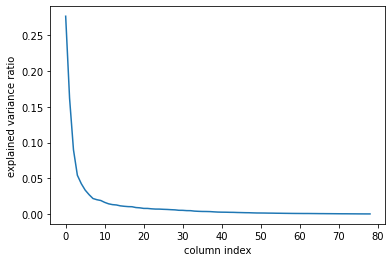

Score (R^2) dla tego modelu bez zastosowania PCA = 0.908152698261587
Najlepszy score (R^2) = 0.9082713198172585 uzyskano dla 74 pierwszych komponentów.


In [ ]:
# PCA

X = df1.iloc[:,:-1]
y = df[:,-1]
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X, y, train_size=0.7)
X_train = X_train_pca.values
X_test = X_test_pca.values

pca = PCA()
pca.fit(X_train_pca)
plt.figure()
plt.xlabel("column index")
plt.ylabel("explained variance ratio")
plt.plot(pca.explained_variance_ratio_) #procent wariancji wyjaśniany przez każdą ze zmiennych (ustawionych w kolejności od tej, która wyjaśnia najwięcej)
plt.show()

pca.components_ #komponenty główne
X_train3 = pca.transform(X_train_pca)
X_test3 = pca.transform(X_test_pca)

m = BayesianRidge()
m.fit(X_train_pca, y_train)
print(f"Score (R^2) dla tego modelu bez zastosowania PCA = {m.score(X_test_pca, y_test)}") 

scores_pca = []
for i in range(1,78):
  m.fit(X_train3[:,0:i], y_train)
  scores_pca.append(m.score(X_test3[:,0:i], y_test))

print(f"Najlepszy score (R^2) = {max(scores_pca)} uzyskano dla {scores_pca.index(max(scores_pca))+1} pierwszych komponentów.")


In [ ]:
#SelectFromModel
#interesuje nas poprawa wkońcowego wyniku, stąd threshold=-np.inf i zmieniamy max_features, żeby porównać wyniki dla każdej możliwej liczby wybranych zmiennych

#selector = SelectFromModel(estimator = BayesianRidge())
#selector.fit(X_train, y_train)
scores_sfm = []
for i in range(1,79):
  selector = SelectFromModel(estimator = BayesianRidge(), threshold=-np.inf, max_features=i)
  selector.fit(X_train, y_train)
  X_train4 = selector.transform(X_train)   #dopasowuje juz tylko do wybranych zmiennych
  X_test4 = selector.transform(X_test)
  m2 = BayesianRidge()
  m2.fit(X_train4, y_train)
  scores_sfm.append(m2.score(X_test4, y_test)) 

print(f"Najlepszy score (R^2) = {max(scores_sfm)} uzyskano dla dopasowania modelu do {scores_sfm.index(max(scores_sfm))} wybranych (przez funkcję SelectFromModel) zmiennych.")

#trochę lepszy score niż dla PCA

Najlepszy score (R^2) = 0.9114336738953708 uzyskano dla dopasowania modelu do 36 wybranych (przez funkcję SelectFromModel) zmiennych.


In [ ]:
m2 = BayesianRidge()
sfm_best = SelectFromModel(estimator = BayesianRidge(), threshold=-np.inf, max_features=36)
sfm_best.fit(X_train, y_train)

SelectFromModel(estimator=BayesianRidge(), max_features=36, threshold=-inf)

In [ ]:
#SequentialFeatureSelector (to działa najlepiej, ale niestety długo się liczy - chyba ok. 1h)

scores = []
for i in range(1,79):
  sfs = SequentialFeatureSelector(BayesianRidge(), n_features_to_select = i)
  sfs.fit(X_train, y_train)
  X_train5 = sfs.transform(X_train)
  X_test5 = sfs.transform(X_test)
  m2 = BayesianRidge()
  m2.fit(X_train5, y_train)
  scores.append(m2.score(X_test5, y_test)) 

print(f"Najlepszy score (R^2) = {max(scores)} uzyskano dla dopasowania modelu do {scores.index(max(scores))} wybranych (przez funkcję SequentialFeatureSelector) zmiennych.")

#najlepszy score

Najlepszy score (R^2) = 0.9256056859374585 uzyskano dla dopasowania modelu do 67 wybranych (przez funkcję SequentialFeatureSelector) zmiennych.


In [ ]:
sfs_best = SequentialFeatureSelector(BayesianRidge(), n_features_to_select = 67)
sfs_best.fit(X_train, y_train)
X_train_best = sfs_best.transform(X_train)
X_test_best = sfs_best.transform(X_test)
m = BayesianRidge()
m.fit(X_train_best, y_train)                       

BayesianRidge()

In [ ]:
#Zmienne wybrane przez każdą z metod
col_names_var = col_names[:-1]
print("Wybrane zmienne:")
print(f"PCA: {pca.feature_names_in_}")
print(f"SelectFromModel: {col_names_var[sfm_best.get_support()]}")
print(f"SequentialFeatureSelector: {col_names_var[sfs_best.get_support()]}")


Wybrane zmienne:
PCA: ['MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold'

Wniosek: najlepiej zadziałała selekcja zmiennych metodą SequentialFeatureSelector - wybrano 67 zmiennych, na których zbudowany model uzyskał najwyższy wynik R^2 (ok. 0.926).

# Modeling

In [ ]:
# test_df = pd.read_csv("/content/WTUM_11_2022/test.csv", header=0)
# print(test_df)
# test_df = df.iloc[:,1:]
# test_df = preprocess(test_df)
# test_df = test_df.values
# X_test = test_df[:,:-1]
# y_test = test_df[:,-1]

In [ ]:
param_grid = {'n_estimators': [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}
random_forest1_clf = GridSearchCV(RandomForestRegressor(), param_grid, n_jobs=-1)
random_forest1_clf.fit(X_train, y_train)

In [ ]:
print(random_forest1_clf.best_params_)
print(random_forest1_clf.score(X_test, y_test))

{'n_estimators': 1000}
0.854239784196487


In [ ]:
param_grid = {'min_samples_split': range(2,20,1)}
random_forest2_clf = GridSearchCV(RandomForestRegressor(n_estimators = 1000), param_grid, n_jobs=-1)
random_forest2_clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(n_estimators=1000), n_jobs=-1,
             param_grid={'min_samples_split': range(2, 20)})

In [ ]:
print(random_forest2_clf.best_params_)
print(random_forest2_clf.score(X_test, y_test))

{'min_samples_split': 2}
0.8546500039877596


In [ ]:
param_grid = {'n_estimators': range(10,170,40), 'min_samples_split': range(2,10,2)}
random_forest_clf = GridSearchCV(RandomForestRegressor(), param_grid, n_jobs=-1)
random_forest_clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 170, 40)})

In [ ]:
print(random_forest_clf.best_params_)
print(random_forest_clf.score(X_test, y_test))

{'min_samples_split': 6, 'n_estimators': 130}
0.882711307933166


In [ ]:
param_grid = {'n_estimators': [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'base_estimator': [None, LinearRegression(), BayesianRidge(), ARDRegression(), Ridge()]}
ada_boost_clf = GridSearchCV(AdaBoostRegressor(), param_grid, n_jobs=-1)
ada_boost_clf.fit(X_train, y_train)

print(ada_boost_clf.best_params_)
print(ada_boost_clf.score(X_test, y_test))

{'base_estimator': BayesianRidge(), 'n_estimators': 700}
0.893396000562253


In [ ]:
param_grid = {'n_estimators': range(10,1010,10)}
ada_boost_tree = GridSearchCV(AdaBoostRegressor(), param_grid, n_jobs=-1)
ada_boost_tree.fit(X_train, y_train)

print(ada_boost_tree.best_params_)
print(ada_boost_tree.score(X_test, y_test))

{'n_estimators': 290}
0.87568047973055


In [ ]:
param_grid = {'n_estimators': range(10,1010,10)}
ada_boost_lr = GridSearchCV(AdaBoostRegressor(base_estimator = LinearRegression()), param_grid, n_jobs=-1)
ada_boost_lr.fit(X_train, y_train)

print(ada_boost_lr.best_params_)
print(ada_boost_lr.score(X_test, y_test))

{'n_estimators': 10}
0.6327129119388744


In [ ]:
param_grid = {'n_estimators': range(10,1010,10)}
ada_boost_br = GridSearchCV(AdaBoostRegressor(base_estimator = BayesianRidge()), param_grid, n_jobs=-1)
ada_boost_br.fit(X_train, y_train)

print(ada_boost_br.best_params_)
print(ada_boost_br.score(X_test, y_test))

{'n_estimators': 460}
0.6617156479334503


In [ ]:
param_grid = {'n_estimators': range(10,1010,10)}
ada_boost_ard = GridSearchCV(AdaBoostRegressor(base_estimator = ARDRegression()), param_grid, n_jobs=-1)
ada_boost_ard.fit(X_train, y_train)

print(ada_boost_ard.best_params_)
print(ada_boost_ard.score(X_test, y_test))

{'n_estimators': 10}
0.6735834622159094


In [ ]:
param_grid = {'n_estimators': range(10,1010,10)}
ada_boost_ridge = GridSearchCV(AdaBoostRegressor(base_estimator = linear_model.Ridge()), param_grid, n_jobs=-1)
ada_boost_ridge.fit(X_train, y_train)

print(ada_boost_ridge.best_params_)
print(ada_boost_ridge.score(X_test, y_test))

{'n_estimators': 10}
0.6529092580935021


In [ ]:
param_grid = {'n_estimators': range(10,150,10), 'max_samples': range(30,90,3)}
bagging_clf = GridSearchCV(BaggingRegressor(), param_grid, n_jobs=-1)
bagging_clf.fit(X_train, y_train)

print(bagging_clf.best_params_)
print(bagging_clf.score(X_test, y_test))

{'max_samples': 87, 'n_estimators': 40}
0.8595034624605216


In [ ]:
param_grid = {'n_iter': [1, 5, 10, 20, 30, 50, 100, 300], 'alpha_1': [1e-8, 1e-6, 1e-4], 'alpha_2': [1e-8, 1e-6, 1e-4, 1e-2, 1], 'lambda_1': [1e-8, 1e-6, 1e-4, 1e-2, 1], 'lambda_2': [1e-8, 1e-6, 1e-4]}
bayes_reg = GridSearchCV(BayesianRidge(), param_grid, n_jobs=-1)
bayes_reg.fit(X_train, y_train)

print(bayes_reg.best_params_)
print(bayes_reg.score(X_test, y_test))

{'alpha_1': 1e-08, 'alpha_2': 1, 'lambda_1': 1, 'lambda_2': 1e-08, 'n_iter': 10}
0.9250620496316406


In [ ]:
param_grid = {'n_iter': [1, 5, 10, 30, 50, 100], 'alpha_1': [1e-8, 1e-6, 1e-4, 1e-2, 1],  'alpha_2': [1e-6, 1e-4, 1e-2, 1],  'lambda_1': [1e-6, 1e-4, 1e-2, 1],  'lambda_2': [1e-6, 1e-4, 1e-2, 1]}
ard_reg = GridSearchCV(ARDRegression(), param_grid, n_jobs=-1)
ard_reg.fit(X_train, y_train)

print(ard_reg.best_params_)
print(ard_reg.score(X_test, y_test))

{'alpha_1': 1e-08, 'alpha_2': 1, 'lambda_1': 0.01, 'lambda_2': 0.0001, 'n_iter': 10}
0.924837270910807


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(lin_reg.score(X_test, y_test))

-1.173811606802655e+23


In [ ]:
# checking acc
print(random_forest_clf.score(X_test, y_test)) # O
print(ada_boost_clf.score(X_test, y_test)) # S
print(bagging_clf.score(X_test, y_test)) # P
print(bayes_reg.score(X_test, y_test)) # J
print(ard_reg.score(X_test, y_test)) # J
print(lin_reg.score(X_test, y_test)) # Done

0.882711307933166
0.893396000562253
0.8595034624605216
0.9250620496316406
0.924837270910807
0.9223793707533178


In [ ]:
#moze jeszcze to by bylo warto 
from sklearn import linear_model
reg = linear_model.Ridge()

# Validation